In [1]:
#설치
# pip install featuretools
# 시각화용 라이브러리
# conda install python-graphviz

In [2]:
import featuretools as ft
import pandas as pd
import numpy as np

In [3]:
# 데모 데이터 로드
data = ft.demo.load_mock_customer()
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [4]:
sessions_df = data["sessions"]
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [5]:
transactions_df = data["transactions"]
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


불러온 데이터 엔티티 정의

In [6]:
entities = {
    "customers" : (customers_df, "customer_id"),
    "sessions" : (sessions_df, "session_id", "session_start"),
    "transactions" : (transactions_df, "transaction_id", "transaction_time")
    }

데이터 relationship 정의 : (parent_entity, parent_variable, child_entity, child_variable) 형태

In [7]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
                 ("customers", "customer_id", "sessions", "customer_id")]

DFS(Deep Feature Synthesis)의 최소 인풋은 위에서 정의한 엔티티와 릴레이션쉽, 그리고 타겟   
가장 간단한 DFS정의   
고객에 관한 새로운 feature가 생긴것을 확인 가능   
target을 바꾸면 다른 데이터로 feature 생성 가능

In [8]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities,relationships=relationships,target_entity="customers")
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,847.63,405.237462,66.21,29,2.286086,257.299895,3,desktop,1,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,1157.99,649.657515,131.51,37,0.002764,356.125829,4,mobile,1,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,839.76,472.231119,86.49,30,0.014384,259.873954,5,mobile,1,3


feature가 생겨난 방법을 시각적으로 확인할 수 있는 툴 제공   
예제를 위해 하나의 feature column을 확인

In [9]:
feature = features_defs[18]
feature

<Feature: WEEKDAY(join_date)>

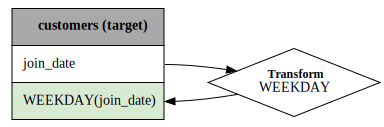

In [10]:
ft.graph_feature(feature)

In [11]:
ft.describe_feature(feature)

'The day of the week of the "join_date".'